# Image Denoising with Autoencoders

**Objective** - We will create 2 neural netwrok model in this project:

1. To train the model from handwritten digit from mnist dataset.

2. To denoise input data(this is autoencoder). In our dataset, there is no noisy data. So, firstly we will add noisy data in Task 3 and then denoise our data. 

___
## Task 1: Introduction and Importing Libraries


**Autoencoding** is a type of artifical neural network which helps to reduce the dimensionality of data by training the network for denoising(to ignore signal noise).

In [0]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Task 2: Data Preprocessing

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# our values are from range 0-255

# now bring these values in range(0,255)
X_train = X_train.astype('float')/255
X_test = X_test.astype('float')/255

# reshaping from (60000, (28,28)) to (60000, 784)
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

## Task 3: Adding Noise

**Objective** - To add articial noisy data in our dataset. 

In [0]:
# this cell is just for understanding
noisyy = np.random.rand(60000, 784)
noisyyy = noisyy * 0.9   # to ensure that value do not become tooo big or tooo small
print("noisyy:", noisyy)
print("\nnoisyy shape :", noisyy.shape)
print("\nnoisyyy:", noisyyy)

noisyy: [[0.69582459 0.43349652 0.3739099  ... 0.39028556 0.38465186 0.22255121]
 [0.12391058 0.46458176 0.90955174 ... 0.96329368 0.91850732 0.52616694]
 [0.93858602 0.59268611 0.32579132 ... 0.54914809 0.77860871 0.22582806]
 ...
 [0.83393083 0.79813878 0.40529666 ... 0.23775143 0.1416923  0.05010536]
 [0.36547917 0.03665682 0.40888859 ... 0.13630027 0.48899139 0.37548752]
 [0.06137785 0.69396621 0.37984677 ... 0.23805107 0.23745354 0.84993077]]

noisyy shape : (60000, 784)

noisyyy: [[0.62624213 0.39014687 0.33651891 ... 0.351257   0.34618668 0.20029609]
 [0.11151953 0.41812358 0.81859656 ... 0.86696431 0.82665659 0.47355025]
 [0.84472742 0.5334175  0.29321218 ... 0.49423328 0.70074784 0.20324525]
 ...
 [0.75053775 0.7183249  0.364767   ... 0.21397629 0.12752307 0.04509483]
 [0.32893125 0.03299113 0.36799973 ... 0.12267024 0.44009225 0.33793877]
 [0.05524007 0.62456959 0.3418621  ... 0.21424596 0.21370818 0.76493769]]


In [0]:
# random.rand - It will give random values in range (0,1)
X_train_noisy = X_train + np.random.rand(60000, 784)*0.9
X_test_noisy = X_test + np.random.rand(10000, 784)*0.9  

# to ensure that our data remains in range(0,1)
# 0. means there are going to be floating values.
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

**Difference between imshow() and show()** - 

1. show() - It show images but do not store many images

2. imshow() - It show images as well as store many images.

# **jerry try to find and answer it please**

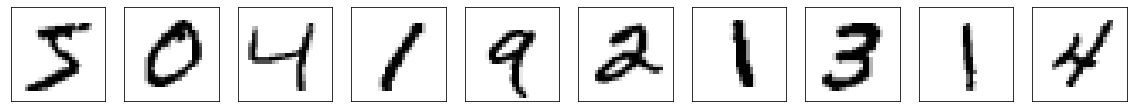

In [0]:
# what happwen when data is noisy
# p - predictions
def plot(x, p, labels=False):
  plt.figure(figsize=(20, 2))
  # we are taking 10 images at a time 
  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x[i].reshape(28, 28), cmap='binary')
    plt.xticks([])
    plt.yticks([])
    # if predictions have been done 
    if labels:
      plt.xlabel(np.argmax(p[i]))
  plt.show()      

plot(X_train, None)

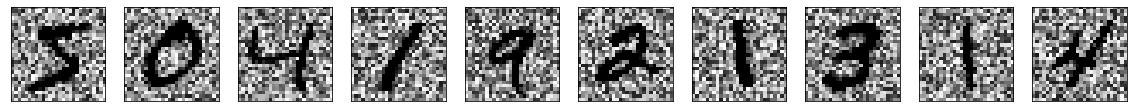

In [0]:
# plot after adding noise to our dataset
plot(X_train_noisy, None)

## Task 4: Building and Training a Classifier

In [0]:
classifier = Sequential([
                         Dense(258, activation='relu', input_shape=(784,)),
                         Dense(258, activation='relu'),
                         Dense(10, activation='softmax')
])

classifier.compile(
    optimizer='adam',
    # if our labels were encoded in onehotencoding then we could use loss='categorical_crossentropy'
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 258)               202530    
_________________________________________________________________
dense_9 (Dense)              (None, 258)               66822     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2590      
Total params: 271,942
Trainable params: 271,942
Non-trainable params: 0
_________________________________________________________________


In [0]:
# batch_size=512 -> This is done to speed up the training
classifier.fit(X_train, Y_train, batch_size=512, epochs=3)

Epoch 1/3
118/118 [==============================] - 2s 17ms/step - loss: 0.4218 - accuracy: 0.8868
Epoch 2/3
118/118 [==============================] - 2s 17ms/step - loss: 0.1548 - accuracy: 0.9551
Epoch 3/3
118/118 [==============================] - 2s 17ms/step - loss: 0.1049 - accuracy: 0.9691


**Without noisy data**

In [0]:
loss, accuracy = classifier.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0987 - accuracy: 0.9703
0.970300018787384


**With noisy data**

In [0]:
loss_noisy, accuracy_noisy = classifier.evaluate(X_test_noisy, Y_test)
print(accuracy_noisy)

313/313 [==============================] - 1s 2ms/step - loss: 9.6860 - accuracy: 0.1614
0.16140000522136688


## Task 5: Building the Autoencoder

If one or more hidden layers in this neural network has not less nodes **(not sure about this word jerry)** compare to the input and output layer then the training process will force the network to learn a function similar to principal component analysis essentially reducing dimensionality. And it will force our model to learn the more important charcteristics from the dataset and focus only on that. 

# **Jerry didn't understand following code properly**

In [0]:
# we take image with 784 features and reduce the dimensionality and force it to have 64 features and at last expand it again(back to 784 features)
# This way, our auto encoder learns to focus only on the important stuff 
input_image = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_image)
decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

## Task 6: Training the Autoencoder

By doin this training, our auto encoder will learn to recognize the important features and learn to ignore non-important features. 

1. **Verbose** is an optional argument which can be used to report more information about an operation in your program.

2. **Validation_split**: Float between 0 and 1. Fraction of the training data to be used as validation data.

3. **Batch_size** denotes the subset size of your training sample (e.g. 100 out of 1000) which is going to be used in order to train the network during its learning process.

4. An **Epoch** refers to one cycle through the full training dataset.

In [0]:
# batch_size=512 -> helps to speed up the training process 
autoencoder.fit(
    X_train_noisy, X_train, epochs=100, 
    batch_size=512, validation_split=0.2, verbose=False, 
    callbacks=[
               # if validation loss does not decrease for 5 epochs then our model will stop the training
               EarlyStopping(monitor='val_loss', patience=5),
               # on_epoch_end - means lambda function will call on the end of each epoch 
               LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

print(' _ ')
print("Training is complete!")

0.259 _ 0.232 _ 0.201 _ 0.182 _ 0.171 _ 0.162 _ 0.154 _ 0.147 _ 0.141 _ 0.136 _ 0.133 _ 0.129 _ 0.126 _ 0.124 _ 0.122 _ 0.120 _ 0.118 _ 0.117 _ 0.116 _ 0.115 _ 0.114 _ 0.113 _ 0.112 _ 0.112 _ 0.111 _ 0.111 _ 0.110 _ 0.110 _ 0.109 _ 0.109 _ 0.109 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.106 _ 0.107 _ 0.106 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _  _ 
Training is complete!


## Task 7: Denoised Images

In [0]:
predictions = autoencoder.predict(X_test_noisy)

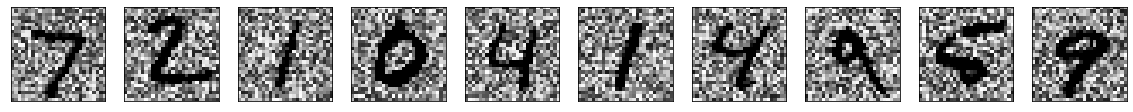

In [0]:
plot(X_test_noisy, None)

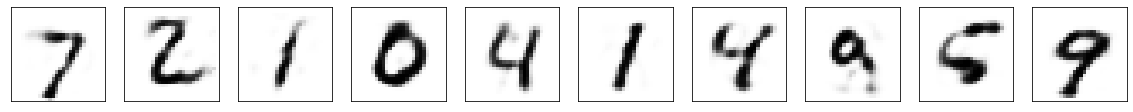

In [0]:
plot(predictions, None)

**Note** - This can be improved more by using convolutional neural network. 

In [0]:
loss, accuracy = classifier.evaluate(X_test_noisy, Y_test)
print("For noisy data - ")
print(accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 9.6860 - accuracy: 0.1614
For noisy data-
0.16140000522136688


In [0]:
loss, accuracy = classifier.evaluate(predictions, Y_test)
print("For denoised data - ")
print(accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 0.1621 - accuracy: 0.9482
For denoised data - 
0.948199987411499


## Task 8: Composite Model

In [0]:
input_image = Input(shape=(784,))
x = autoencoder(input_image)   # hopefully x is denoised image 
y = classifier(x)

denoise_and_classify = Model(input_image, y)

In [0]:
predictions = denoise_and_classify.predict(X_test_noisy)

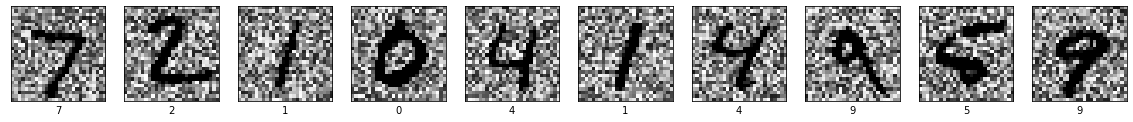

In [0]:
plot(X_test_noisy, predictions, True)

In [0]:
a=to_categorical(Y_test)
print(Y_test[0])
print(a[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


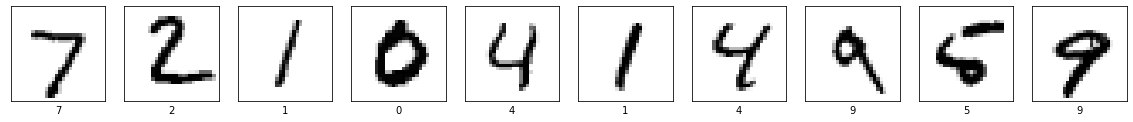

In [0]:
plot(X_test, to_categorical(Y_test), True)